# 5. 인물사진을 만들어 보자.

## 5-1. 들어가며

피사체를 가깝게 찍을 때 배경이 흐려지는 효과를 경험해 보신 적이 있으신가요? 보통은 DSLR이나 미러리스 같은 전문적인 카메라와 렌즈에서 만들어 내기 쉬운 효과입니다. 하지만 피사체를 충분히 가까운 거리에 두고 촬영한다면 핸드폰 카메라에서도 비슷한 효과를 낼 수 있습니다.

특히 2개 이상의 렌즈를 탑재한 최신 핸드폰에서는 **'인물사진 모드(portrait mode)'** 가 지원됩니다.

iPhone에서 인물 사진 모드 사용하기
핸드폰 카메라의 인물사진 모드는 듀얼 카메라를 이용해 DSLR의 아웃포커싱 기능을 흉내 냅니다. 물론 인물사진의 아웃포커싱 구현은 DSLR의 아웃포커싱 구현과는 다릅니다.

DSLR에서는 사진을 촬영할 때 피사계 심도(depth of field, DOF)를 얕게 하여 초점이 맞은 피사체를 제외한 배경을 흐리게 만듭니다.
핸드폰 인물사진 모드는 화각이 다른 두 렌즈를 사용합니다. 일반(광각) 렌즈에서는 배경을 촬영하고 망원 렌즈에서는 인물을 촬영한 뒷배경을 흐리게 처리한 후 망원 렌즈의 인물과 적절하게 합성합니다.
오늘 만들어볼 목표는 핸드폰 인물사진 모드입니다. 사실 핸드폰 인물 사진 모드를 정확히 따라 하기 위해서 2개의 렌즈가 필요하지만 딥러닝을 적용해서 하나의 렌즈만으로 비슷하게 흉내 내 보겠습니다.

### 인물사진 모드에서 사용되는 용어

한국에서는 배경을 흐리게 하는 기술을 주로 '아웃포커싱'이라고 표현합니다. 하지만 아웃포커싱은 한국에서만 사용하는 용어이고 정확한 영어 표현은 **얕은 피사계 심도(shallow depth of field)** 또는 **셸로우 포커스(shallow focus)** 라고 합니다.

또한 "보케(bokeh)"라는 일본어에서 유래된 표현 또한 많이 사용합니다. 영문권에서도 많이 사용하는 용어지만 사실 전문적으로 사진을 다루시는 분이 아니라면 그 의미가 직관적으로 다가오기 어렵습니다. 핸드폰 제조사에서도 이것을 알고 '인물사진(portrait)'이라는 직관적인 용어를 잘 만들어 낸 것 같습니다.

## 5-2. 셸로우 포커스 만들기 (1) 사진을 준비하자

### 하나의 카메라로 셀로우 포커스(shallow focus)를 만드는 방법

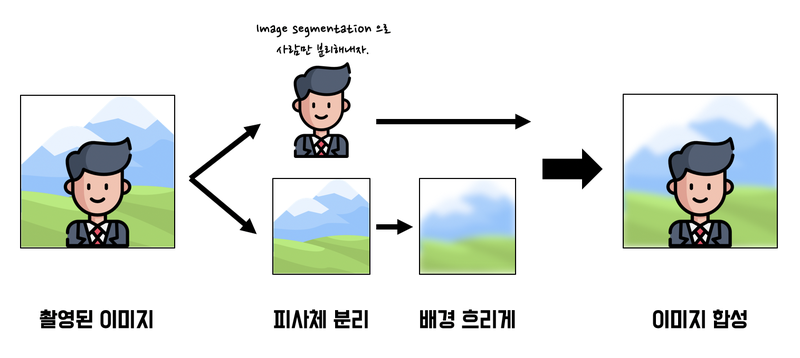

두 개의 렌즈가 맡은 역할을 하나의 렌즈에서 구현해야 합니다. 이미지 세그멘테이션(image segmentation) 기술을 이용하면 하나의 이미지에서 배경과 사람을 분리할 수 있습니다. 분리된 배경을 블러(blur) 처리 후 사람 이미지와 다시 합하면 아웃포커싱 효과를 적용한 인물 사진을 얻을 수 있습니다.

따라서 우리는 다음과 같은 후가공으로 '인물사진 모드'인 사진을 만들 겁니다.

1. 배경이 있는 셀카를 촬영합니다. (배경과 사람의 거리가 약간 멀리 있으면 좋습니다.)
2. 시맨틱 세그멘테이션(Semantic segmentation)으로 피사체(사람)와 배경을 분리합니다.
3. 블러링(blurring) 기술로 배경을 흐리게 합니다.
4. 피사체를 배경의 원래 위치에 합성합니다.

### 사진을 준비하자

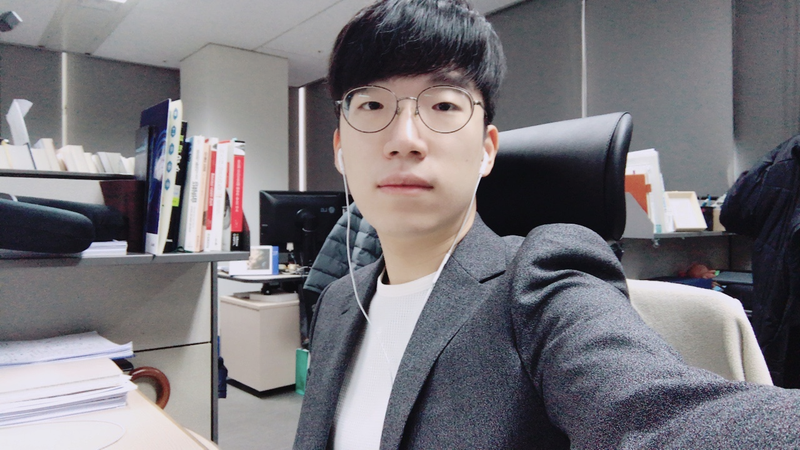


사용할 디렉토리 구조
```
- aiffel/human_segmentation
    ├── models
        └── deeplabv3_xception_tf_dim_ordering_tf_kernels.h5 (미리 준비할 필요는 없습니다)
    ├── images
        └── my_image.png
```



In [3]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

ModuleNotFoundError: No module named 'cv2'